# The Cournot Model

In this project we will analyze the traditionel Cournot model, known from lectures at the Micro 1,2 and 3. In Cournot competition the firms competes in quantities thereby choosing the quantity taken into account the best response choice of the other firms to that quantity. Firstly, we will present the settings of the model. Then heading for an analytical and numerical solution of a 2 firm case where the firms have asymmetric cost functions. Then we will simplify the settings and presents an analytical and numerical solution for a case, where the firms have symmetric cost functions. Further we test how this simplified case is affected by the number of firms. At last we presents how the quantities, profits etc is affected, when if firms colludes and thereby make a monopoly.

In [1]:
"""
# autoreload modules when code is run
%reload_ext autoreload
%autoreload 2

# Importing useful packages
import numpy as np
import scipy as sp
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pylab

from ipywidgets import interact, interactive, fixed, interact_manual

import modelproject as mpy

# Er nedenstående nødvendige?
from numpy import array
from scipy import linalg
from scipy import optimize

# Sympy package helps writing  
sm.init_printing(use_unicode=True)

from sympy import *
"""

'\n# autoreload modules when code is run\n%reload_ext autoreload\n%autoreload 2\n\n# Importing useful packages\nimport numpy as np\nimport scipy as sp\nimport sympy as sm\nimport matplotlib.pyplot as plt\nimport ipywidgets as widgets\nimport pylab\n\nfrom ipywidgets import interact, interactive, fixed, interact_manual\n\nimport modelproject as mpy\n\n# Er nedenstående nødvendige?\nfrom numpy import array\nfrom scipy import linalg\nfrom scipy import optimize\n\n# Sympy package helps writing  \nsm.init_printing(use_unicode=True)\n\nfrom sympy import *\n'

In [2]:
# Importing packages
from __future__ import print_function
import numpy as np
import scipy as sp
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from sympy import simplify
import modelproject as mpy

## The setting of the model:

We examine a market with $N$ firms, whom produce the same homogenous good. Thereby the good produced of firm $i$ is a perfect substitute for a good produced of firm $j$. Furthermore we assume that the aggregate demand of the good $x$ is linearly given by:
$$p(x)=a-b*x$$
Every firm $i$ has a costfunction given by:
$$C(x_i)=k*x_i^2$$ where the aggregate quantity in the market is given as:
$$x=\sum_{j=0}^N(x_j)$$

We then have that firm $i$ wish to maximize his profitfunction given by:
$$\underset{x_i}{max}: p(\sum_{j=0}^Nx_j)x_i)-C(x_i) =p(x)x_i-C(x_i)$$

So we have that firm $i$ is going to choose how much to produce given what the other firms in the market produces. It is intuitively that for  $N \rightarrow \infty$ 
this modelsetup describes the setting of perfect competition. Futhermore it is intuitive to imagine that for $N\rightarrow 1$ 
the setting describes a monopolistic competition situation. These two outer cases will be examized later in the project.

## Analytical Solution for 2 firms

We will now examine the analytical solution for only 2 firms  (A and B) competiting with assymetric cost functions. We assume that firm A has a cost function given by: $C_A=\frac{k}{2}*x_a^2$. The cost function of firm B is given by: $C_B=k*x_b^2$. 

In [3]:
# Defining the elements in the firms choice

a = sm.symbols('a')
b = sm.symbols('b')
qa, qb = sm.symbols('q_a q_b') 
k = sm.symbols('k')

In [4]:
# We start by defining the linear demand function:
def p_total(qa,qb,a,b):
    return (a-b*(qa+qb))

#Defining the cost function of firm A:
def c_A(qa,k):
    return ((k/2)*qa**2)

#Defining the cost function of firm B:
def c_B(qb,k):
    return (k*qb**2)

#The profitfunction of firm A:
def profit_A(qa,qb,a,b,k):
    return (p_total(qa,qb,a,b) * qa - c_A(qa,k))
    
#The profitfunction of firm B:
def profit_B(qa,qb,a,b,k):
    return (p_total(qa,qb,a,b) * qb - c_B(qb,k))

In [5]:
#We will now find the derivative, which we will use to find the best response functions

foc_a = sm.diff(profit_A(qa,qb,a,b,k),qa)
foc_b = sm.diff(profit_B(qa,qb,a,b,k),qb)
print('First order conditions for firm A and B are given by:')
display(foc_a,foc_b)

First order conditions for firm A and B are given by:


a - b*q_a - b*(q_a + q_b) - k*q_a

a - b*q_b - b*(q_a + q_b) - 2*k*q_b

In [6]:
#We find the best response functions by isolating respectively qa and qb in the above found derivatives
sola = sm.solve(sm.Eq(foc_a,0),qa)[0]
solb = sm.solve(sm.Eq(foc_b,0),qb)[0]

print('The best repsonse functions for firm A and B respectively are given by:')
display(sola,solb)

The best repsonse functions for firm A and B respectively are given by:


(a - b*q_b)/(2*b + k)

(a - b*q_a)/(2*(b + k))

In [7]:
#To find the quantity firm A wants to produce we substitute firm B's best response function into firm A's best reponse and then solve for q_a 
sola_subs = foc_a.subs(qb,solb) #substituting the best response function of firm B into the FOC of firm A
q_astar = sm.solve(sola_subs,qa) #Solving for q_a

solb_subs = foc_b.subs(qa,sola) #substituting the best response function of firm A into the FOC of firm B
q_bstar = sm.solve(solb_subs,qb) #Solving for q_b

print('The optimal quantities for firm A and B respectively are given by:')
display(q_astar[0], q_bstar[0]) #Showing the optimal quantities


The optimal quantities for firm A and B respectively are given by:


a*(b + 2*k)/(3*b**2 + 6*b*k + 2*k**2)

a*(b + k)/(3*b**2 + 6*b*k + 2*k**2)

In [8]:
#Here we find the optimal quantities for both firms with another code. The result is identical with the result above. Here we just use that we can solve 2 equation with 2 unknowns.

sm.solve([foc_a, foc_b], [qa, qb]) #solving 2 equations with 2 unknowns 

{q_a: -a*(b + 2*k)/(b**2 - 2*(b + k)*(2*b + k)),
 q_b: -a*(b + k)/(b**2 - 2*(b + k)*(2*b + k))}

In [9]:
#We are now able to find the price the firms will take for the good and the profit each firm get:

price = simplify(p_total(q_astar[0],q_bstar[0],a,b))
profita = simplify(profit_A(q_astar[0],q_bstar[0],a,b,k))
profitb = simplify(profit_B(q_astar[0],q_bstar[0],a,b,k))

print("The price of the good is given by:")
display(price)

print('The profits of firm A and B respectively are given by:')
display(profita,profitb)


The price of the good is given by:


a*(b**2 + 3*b*k + 2*k**2)/(3*b**2 + 6*b*k + 2*k**2)

The profits of firm A and B respectively are given by:


a**2*(b + 2*k)*(6*b**2 + 12*b*k - 2*b*(2*b + 3*k) + 4*k**2 - k*(b + 2*k))/(2*(3*b**2 + 6*b*k + 2*k**2)**2)

a**2*(b + k)*(3*b**2 + 6*b*k - b*(2*b + 3*k) + 2*k**2 - k*(b + k))/(3*b**2 + 6*b*k + 2*k**2)**2

## Numerical example

We will now examine the above 2 firm case, where we assume that $a=50$. Furthermore we assume that $k=3$ and $b=1$.
This specific setting result in a situation, where firm A has lower marginal cost compared to firm B for $q_i>0$. As a result we expect firm A to both produce more than firm B and get a higher profit.

In [10]:
#We start by setting the values:
a=50
b=1
k=3

#The derivative:
foc_a = sm.diff(profit_A(qa,qb,a,b,k),qa)
foc_b = sm.diff(profit_B(qa,qb,a,b,k),qb)

#The best responsefunctions 
sola= sm.solve(sm.Eq(foc_a,0),qa)[0]
solb= sm.solve(sm.Eq(foc_b,0),qb)[0]

#We can now calculate the quantity firm A and B wants to produce, using the best response functions. 
sola_subs = foc_a.subs(qb,solb) #substituting the best response into the FOC of firm A
q_astar = sm.solve(sola_subs,qa) #Solving for q_a

solb_subs = foc_b.subs(qa,sola) #substituting the best response into the FOC of firm A
q_bstar = sm.solve(solb_subs,qb)

#We are now able to find the prices the firms will take for the good and the profit each firm get:
price = simplify(p_total(q_astar[0],q_bstar[0],a,b))
profita = simplify(profit_A(q_astar[0],q_bstar[0],a,b,k))
profitb = simplify(profit_B(q_astar[0],q_bstar[0],a,b,k))


print('The first order conditions for firm A and B respectively are given by:')
display(foc_a,foc_b)

print('The best repsonse functions for firm A and B respectively are given by:')
display(sola,solb)

print('The optimal quantities for firm A and B respectively are given by:')
display(q_astar[0], q_bstar[0]) #Showing the optimal quantities

print("The price of the good is given by:")
display(price)

print('The profits of firm A and B respectively are given by:')
display(round(profita,2),round(profitb,2))

The first order conditions for firm A and B respectively are given by:


-5.0*q_a - q_b + 50

-q_a - 8*q_b + 50

The best repsonse functions for firm A and B respectively are given by:


10.0 - 0.2*q_b

25/4 - q_a/8

The optimal quantities for firm A and B respectively are given by:


8.97435897435897

5.12820512820513

The price of the good is given by:


35.8974358974359

The profits of firm A and B respectively are given by:


201.35

105.19

The above calculates indicates that a firm with lower cost relative to the other firms will produce more and get a higher profit. This is as expected, why we proceed. 


 The kink point is the optimal quantities. For firm A: 8.97435897435897and for firm B:5.12820512820513


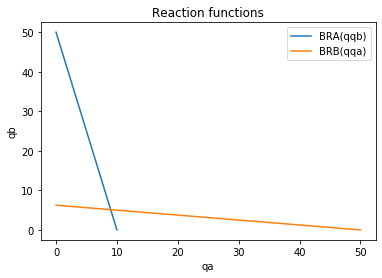

In [11]:
# Ploting the two best response functions (bemærk det er egne beregninger. Kan ikke huske hvad der skal inverteres og sådan noget for at man kan lave det grafisk. Men de burde passe)

plt.plot([0,6,10],[50,20,0], label = 'BRA(qqb)')
plt.plot([0,10,50],[25/4,5,0], label = 'BRB(qqa)')
plt.legend()
plt.xlabel('qa')
plt.ylabel('qb')
plt.title('Reaction functions')

print("\n The kink point is the optimal quantities. For firm A: " + str(q_astar[0]) + "and for firm B:" + str(q_bstar[0])) 


The best response functions for firm A and B shows the general result that the quantity choosen by a firm (in this particular case firm A) is negatively affected by the quantity of the other firm (in this case firm B) and vice versa. The kink point indicates the optimal quantities for both firms.

## Analytical Solution 

We will now show the numerical solution for two firms with symmetric cost functions. This is done by using the functions from modelproject.py.  OPMÆRKSOM - skal det være numerical eller analytical denne intro giver ikke mening!

In [12]:
#We start by finding the analytics solution for firm i under symmetric cost function
k = sm.symbols('k')
a = sm.symbols('a')
b = sm.symbols('b')
N= sm.symbols('n') # Number of firms 
qi = sm.symbols('q_i') #quantity of the N firm 

Solution = mpy.solution_cournot(N,a,b,k)
print('\n The total quantity produced in the market is: ') #Er dette for virksomhed i eller den samlede mængde produceret i markedet?
display(Solution[0])
print('\n The price is: ')
display(Solution[1])
print('\n The quantity for firm i is: ')
display(Solution[2])
print('\n The the profit for firm i is: ')  
display(Solution[3])


 The total quantity produced in the market is: 


n*(a - k)/(b*(n + 1))


 The price is: 


a - n*(a - k)/(n + 1)


 The quantity for firm i is: 


(a - k)/(b*(n + 1))


 The the profit for firm i is: 


(a**2 - 2*a*k + k**2)/(b*(n**2 + 2*n + 1))

## Numerical Solution 

We will now solve the above example numeric using the same functions defined in modelproject.py.

In [13]:
#OPMÆRKSOM - skal denne står her Interaktiv metode til at opskrive løsning. Også opmærksom på hvad c1 og c2 svarer til!
def f(a, b, c1, c2):
    display(f'Optimal quantity non-identical firm 1 is {(a-2*c1+c2)/(3*b)}')
    display(f'Optimal quantity non-identical firm 2 is {(a-2*c2+c1)/(3*b)}')
    display(f'The profit given parameter values for non-identical firm 1 is {(((a-2*c1+c2))**2)/(9*b)}')
    display(f'The profit given parameter values for non-identical firm 2 is {(((a-2*c2+c1))**2)/(9*b)}')
interact(f, a=(0.0,10.0), b=(0.0,1.0), c1=(0.0,5.0), c2=(0.0,5.0));


interactive(children=(FloatSlider(value=5.0, description='a', max=10.0), FloatSlider(value=0.5, description='b…

In [14]:
#We start by setting the values:
a = 50
b = 1
k = 1
N = 2 # Number of firms 

Solution = mpy.solution_cournot(N,a,b,k)
pcquantity = mpy.perfect_com(qi,N,a,b,k)
print('\n The total quantity is: ')
display(round(Solution[0]))
print('\n The price is: ')
display(round(Solution[1]))
print('\n The quantity for firm i is: ')
display(round(Solution[2]))
print('\n The the profit for firm i is: ')  
display(round(Solution[3]))
print('\n The quantity for perfect competition: ')
display(round(pcquantity[0]))

#print('\n The total quantity is: ' + str(round(Solution[0],2)))
#print('\n The price is: ' + str(round(Solution[1],2)))
#print('\n The quantity for firm i is: ' + str(round(Solution[2],2)))
#print('\n The the profit for firm i is: ' + str(round(Solution[3],2)))  
#print('\n The quantity for perfect competition: ' + str(round(pcquantity[0])))


widgets.interact(mpy.plot_deadweight_loss,
    N = widgets.IntSlider(description="$Number of firms$",min=1,max=100),
    a = a,
    b = b,
    k = k
) 


 The total quantity is: 


33


 The price is: 


17


 The quantity for firm i is: 


16


 The the profit for firm i is: 


267


 The quantity for perfect competition: 


49

interactive(children=(IntSlider(value=1, description='$Number of firms$', min=1), IntSlider(value=50, descript…

<function modelproject.plot_deadweight_loss(N, a, b, k)>

# Collusion

We are now going to examine a situation where 2 firms are chooses to collude on the chosen quantities. 

To simplify the analysis we are again examing a case of 2 firms with symmetric costfunctions given by $C(q_i)=k*q_i$. When the firms have the same cost function we can derive the "combined costfunction":
$$C(Q)=C(q_A)+C(q_B)\Rightarrow k*q_A+k*q_B \Rightarrow k*(q_A+q_B)\Rightarrow k*Q$$

When firms collude they can choose quantities as to maximize the total producer profit in the market. In other word when colluding the firms can act as an monopoly. After they have set the prices and choosen the quantities to produce, the firms can split the profit. When assuming the firms have the same costfunctions leading to a constant marginal cost function, then it does matter which firm there produce the quantity. In other words firm A can produce all the quantity to maximize the combined profit function or they can split the quantity in half or firm B can produce the quantity. The only thing that matters is that the colluding acting as a monopoly. In the example below we assume that they will split the quantity in half. 

In [ ]:
#In the coding above we have set parameters as global specific numbers. Therefore we start by making them parameters again:
a = sm.symbols('a')
b = sm.symbols('b')
k = sm.symbols('k')
Q = sm.symbols('Q')

#The demand function is still the same. The only difference is that now the :
# We start by defining the linear demand function:
def p_monototal(Q,a,b):
    return (a-b*(Q))

#The "combined" cost function:
def cost_mono(Q,k):
    return k*Q   

#So the firms will now maximize the total profit in the market:
def profit_mono(Q,a,b,k):
    return (p_monototal(Q,a,b) * Q - cost_mono(Q,k))

We are now able of solving the monopoly problem:

In [ ]:
#We start by finding the optimal quantity:

foc_mono = sm.diff(profit_mono(Q,a,b,k),Q)
print('\n The FOC for the monopoly : ')
display(foc_mono)

Q_mono = sm.solve(sm.Eq(foc_mono,0),Q)[0]

print('\n The chosen quantity for the monopoly: ')
display(Q_mono)

print('\n The price for the given monopolistic quantity: ')
display(p_monototal(Q_mono,a,b))

print('\n The profit for the monopoly: ')
profit_mono(Q_mono,a,b,k)

In [ ]:
a = 50
b = 1
k = 2

foc_mono = sm.diff(profit_mono(Q,a,b,k),Q)
print('\n The FOC for the monopoly : ')
display(foc_mono)

Q_mono = sm.solve(sm.Eq(foc_mono,0),Q)[0]

#We start by finding the optimal quantity:

print('\n The chosen quantity for the monopoly: ')
display(Q_mono)

print('\n The price for the given monopolistic quantity: ')
display(p_monototal(Q_mono,a,b))

print('\n The profit for the monopoly: ')
profit_mono(Q_mono,a,b,k)

# Conclusion

we are now able to make the concluding remarks. At first we have shown that higher marginal costs (firm A relative to firm B) leads to lower produced output for firm A relative to firm B. Thereby we show the genereal result that the firms need to take into account their cost functions because the cost functions will affect the quantities sold and therefore also the profits.
Furthermore we have shown that when solving a cournot model it is necessary that the firms take the other firms quantity choices into account. 

In the Analytical solution section we have shown that when the firms have symmetric cost functions the firms will produce the same quantity - this is also a general result.

It could have been interresting to analyze what have happened to the quantities if the firms had been competiting in prices instead of quantities (also known as Bertrand competetion), this is left as perspective for the interested reader.

At last we looked at the simplified case of symmetric cost functions and apply an interactive figure where N can go from 1 to 100. Here we saw that as N increases the total produced quantity goes toward the equilibrium of perfect competition and the deadweight loss decreases. This supports the introductary statement that for $N\rightarrow 1$ 
the setting describes a monopolistic competition situation and for $N \rightarrow \infty$ the 
model describes the setting of perfect competition. 

BEMÆRK:: mangler konklusion på colluding